In [1]:
pip install keras nltk tensorflow sklearn seaborn

Processing /root/.cache/pip/wheels/de/5e/42/64abaeca668161c3e2cecc24f864a8fc421e3d07a104fc8a51/nltk-3.5-py3-none-any.whl
  Using cached seaborn-0.11.0-py3-none-any.whl (283 kB)
  Using cached tqdm-4.49.0-py2.py3-none-any.whl (69 kB)
  Using cached regex-2020.7.14-cp36-cp36m-manylinux2010_x86_64.whl (660 kB)
  Using cached joblib-0.16.0-py3-none-any.whl (300 kB)
  Using cached matplotlib-3.3.2-cp36-cp36m-manylinux1_x86_64.whl (11.6 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached kiwisolver-1.2.0-cp36-cp36m-manylinux1_x86_64.whl (88 kB)
  Using cached certifi-2020.6.20-py2.py3-none-any.whl (156 kB)
  Attempting uninstall: certifi
    Found existing installation: certifi 2019.11.28
    Uninstalling certifi-2019.11.28:
      Successfully uninstalled certifi-2019.11.28
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pickle as pkl
import time, nltk
import unicodedata
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, precision_score, recall_score, make_scorer, log_loss
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, cross_validate, RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout

from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# import time
# t0 = time.time()
# # your code here
# t1 = time.time()
# total_runtime = t1-t0 

# import pyspark as ps    # for the pyspark suite
# spark = (ps.sql.SparkSession
#          .builder
#          .master('local[4]')
#          .appName('lecture')
#          .getOrCreate()
#         )

# sc = spark.sparkContext

Using TensorFlow backend.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
stop_words = set(stopwords.words('english'))

In [44]:
import os               # for environ variables in Part 3
# from RottenorNot import extract_bow_from_raw_text
# import json

df = pd.read_csv('rotten_tomatoes_reviews.csv')
df = df.drop_duplicates(subset=['Review', 'Freshness'])


X_train, X_test, y_train, y_test = train_test_split(clean(), test_size=0.2, shuffle=True)

ValueError: not enough values to unpack (expected 4, got 2)

In [5]:
#get X and y
y = df['Freshness'].to_numpy()
X = df["Review"]

           
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [8]:
# from RottenorNot import extract_bow_from_raw_text
# # extracting bows
# bows = list(map(lambda row: extract_bow_from_raw_text(row), X_train))

In [17]:
# y.shape, X.shape
# df['Freshness'].value_counts()

1    188127
0    151589
Name: Freshness, dtype: int64

In [9]:
# pickle_out = open('myBows.pkl','wb')
# pkl.dump(bows, pickle_out)
# pickle_out.close()

pickle_in = open('myBows.pkl','rb')
my_bows = pkl.load(pickle_in)

In [5]:
# corpus = [row for row in X_train]

In [7]:
# from sklearn.feature_extraction.text import CountVectorizer

# tf = CountVectorizer(analyzer='word', max_features=10000, stop_words='english')

# document_tf_matrix = tf.fit_transform(corpus).todense()

In [8]:
# from math import log

# def idf(frequency_matrix):
#     df =  float(len(document_tf_matrix)) / sum(frequency_matrix > 0)
#     return [log(i) for i in df.getA()[0]]
# print(sorted(tf.vocabulary_))
# print(idf(document_tf_matrix))

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer='word', max_features=50000, stop_words='english')
document_tfidf_matrix = tfidf.fit_transform(X_train)
# print(sorted(tfidf.vocabulary_))
# print(document_tfidf_matrix.todense())

In [7]:
model_log_regress = LogisticRegression(random_state=1)
random_forest = RandomForestClassifier()
gradient_boost = GradientBoostingClassifier()

In [10]:
log_reg_score = cross_validate(model_log_regress, document_tfidf_matrix, y_train, max_iter=325, solve='lbfgs', verbose=1, cv=3, scoring=['accuracy', 'precision', 'recall'])
for key, val in log_reg_score.items():
    print(f'{key}: {val.mean()}')

fit_time: 8.835264046986898
score_time: 0.16114219029744467
test_accuracy: 0.7863356102415828
test_precision: 0.7935945947865365
test_recall: 0.830300345965331
test_f1: 0.8115288933868912


In [11]:
forest_score = cross_validate(random_forest, document_tfidf_matrix, y_train, cv=3, scoring=['accuracy', 'precision', 'recall'], verbose=4, n_jobs=-1)
for key, val in forest_score.items():
    print(f'{key}: {val.mean()}')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.


fit_time: 274.342848221461
score_time: 10.134609778722128
test_accuracy: 0.7132817182670436
test_precision: 0.7507894603799826
test_recall: 0.7222480198304885
test_f1: 0.7362221356220421


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  4.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  4.8min finished


In [12]:
gradient_score = cross_validate(gradient_boost, document_tfidf_matrix, y_train, cv=3, verbose=4, scoring=['accuracy', 'precision', 'recall'], n_jobs=-1)
for key, val in gradient_score.items():
    print(f'{key}: {val.mean()}')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.


fit_time: 442.98832273483276
score_time: 0.8197429180145264
test_accuracy: 0.6328429721978334
test_precision: 0.6087003240099009
test_recall: 0.9443765773050354
test_f1: 0.7402582536644365


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  7.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  7.5min finished


In [14]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


rf_random = RandomizedSearchCV(random_forest, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
# rf_random.fit(document_tfidf_matrix, y_train)

In [19]:
best_rf = rf_random.fit(document_tfidf_matrix, y_train)
print(f"Best params: {best_rf.best_params_, best_rf.best_score_}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 433.9min finished


Best params: ({'n_estimators': 1800, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}, 0.7429978069852671)


In [ ]:
Best params: ({'n_estimators': 1800, 
               'min_samples_split': 2, 
               'min_samples_leaf': 2, 
               'max_features': 'auto', 
               'max_depth': None, 
               'bootstrap': True})

# supposedly best score butttt unsure of what 0.7429978069852671

In [45]:
# pipe = Pipeline([('classifier' , LogisticRegression())])
# Create param grid
max_iter = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 25)]
solver = ['lbfgs', 'liblinear']
verbose = [1, 2, 4]
random_state = [21, 42]
n_jobs = -1
# Create the random grid
random_grid = {'max_iter': max_iter,
               'solver': solver,
               'verbose': verbose,
               'random_state': random_state}

# Create grid search object

clf = RandomizedSearchCV(model_log_regress, param_distributions=random_grid, n_iter=100, n_jobs=n_jobs)

# Fit on data
logist_clf = clf.fit(document_tfidf_matrix, y_train)
# best_clf = clf.fit(X_train, y_train)

print("Best: %f using %s" % (logist_clf.best_score_, logist_clf.best_params_))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best: 0.786726 using {'verbose': 4, 'solver': 'lbfgs', 'random_state': 42, 'max_iter': 100}


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.0s finished


In [117]:
# # Define a pipeline combining a text feature extractor with multi lable classifier
# NB_pipeline = Pipeline([
#                 ('tfidf', tfidf),
#                 ('clf', OneVsRestClassifier(MultinomialNB(
#                     fit_prior=True, class_prior=None))),
#             ])



# unsure_clf = GridSearchCV(NB_pipeline, cv=5, n_jobs=-1, param_grid=param_grid ,scoring=['f1', 'recall', 'precision'])
# best_clf = clf.fit(X_train, y_train)
# print(f'best params: {}')

NameError: name 'pipeline' is not defined

In [96]:
# train the model using X_dtm & y
fitted_pipe = NB_pipeline.fit(X_train, y_train)
# compute the testing accuracy
prediction = NB_pipeline.predict(X_test)

prediction.shape

(67944,)

In [28]:
'''LSTM builder'''
import re


df = df.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower()
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    text = BAD_SYMBOLS_RE.sub('', text) 
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    return text

df['Review'] = df['Review'].apply(clean_text)
df['Review'] = df['Review'].str.replace('\d+', '')

# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 45
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['Review'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 127465 unique tokens.


In [29]:
X = tokenizer.texts_to_sequences(df['Review'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Y = pd.get_dummies(df['Freshness']).values
print('Shape of label tensor:', Y.shape)

Shape of data tensor: (339716, 45)
Shape of label tensor: (339716, 2)


In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(305744, 45) (305744, 2)
(33972, 45) (33972, 2)


In [32]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train,
                    epochs=epochs, batch_size=batch_size,
                    validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])



Train on 275169 samples, validate on 30575 samples
Epoch 1/5
275169/275169 [==============================] - 868s 3ms/step - loss: 0.4605 - accuracy: 0.7799 - val_loss: 0.4195 - val_accuracy: 0.8061
Epoch 2/5
275169/275169 [==============================] - 834s 3ms/step - loss: 0.3687 - accuracy: 0.8333 - val_loss: 0.4178 - val_accuracy: 0.8089
Epoch 3/5
275169/275169 [==============================] - 844s 3ms/step - loss: 0.3207 - accuracy: 0.8591 - val_loss: 0.4344 - val_accuracy: 0.8092
Epoch 4/5
275169/275169 [==============================] - 809s 3ms/step - loss: 0.2793 - accuracy: 0.8792 - val_loss: 0.4510 - val_accuracy: 0.8040
Epoch 5/5
275169/275169 [==============================] - 798s 3ms/step - loss: 0.2407 - accuracy: 0.8981 - val_loss: 0.4958 - val_accuracy: 0.7995


In [33]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

33972/33972 [==============================] - 23s 666us/step
Test set
  Loss: 0.507
  Accuracy: 0.794


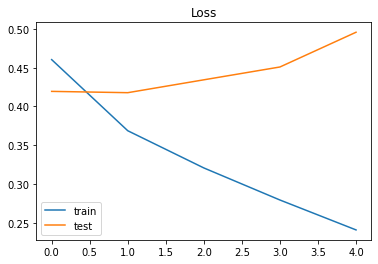

In [39]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.savefig('LSTM_Loss.png')
plt.show();

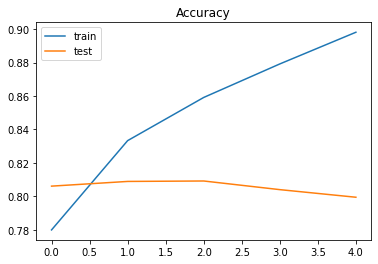

In [40]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.savefig('LSTM_Accuracy.png')
plt.legend()
plt.show();